## Required Imports

In [1]:
import keras
import tensorflow as tf
import seaborn as sn
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

2022-08-25 17:37:00.388783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-25 17:37:00.388805: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Gathering Dataset

In [2]:
mnist = tf.keras.datasets.mnist

# getting dataset in x and y parameters because it returns 2 values
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshaping and Normalizing the dataset
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images/255

print("Shape of train_images: ", train_images.shape)
print("Shape of test_images: ", test_images.shape)

Shape of train_images:  (60000, 28, 28, 1)
Shape of test_images:  (10000, 28, 28, 1)


## Instantiate or Build the Model

In [3]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Add only if required
model.add(layers.Conv2D(64,(3,3), activation='relu'))

# Add only if required
# model.add(tf.keras.layers.Dropout(0.2))

model.add(layers.Flatten())

# Add only if required
model.add(layers.Dense(204, activation='relu'))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

2022-08-25 17:37:02.352493: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-25 17:37:02.352516: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-25 17:37:02.352531: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-H410M-H-V3): /proc/driver/nvidia/version does not exist
2022-08-25 17:37:02.352752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile the model

In [4]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [5]:
model.fit(train_images, 
          train_labels, 
          epochs= 1, 
          batch_size= 64
         )

2022-08-25 17:37:02.502291: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


938/938 [==============================] - 18s 19ms/step - loss: 0.1668 - accuracy: 0.9492


## Evaluating the model 

In [6]:
model.evaluate(test_images, test_labels)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0509 - accuracy: 0.9840


0.984000027179718

## Predicting whole test_images in one go 

In [7]:
y_prob = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


## Finding list which has highest probability from y_prob

In [8]:
y_pred = y_prob.argmax(axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

## Calculating Accuracy 

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred)

0.984

## Confusion Matrix

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Actual Value')

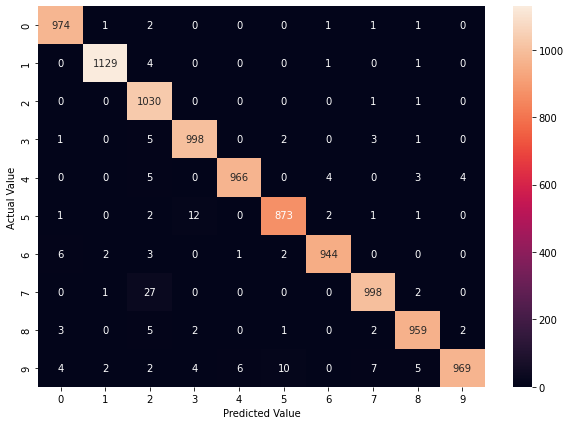

In [10]:
prediction = model.predict(test_images).argmax(axis=1)
cm = confusion_matrix(test_labels, prediction)
# print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

## Plotting few test inputs

313/313 [==============================] - 1s 3ms/step
[1.2685227e-06 6.0807392e-06 7.8014218e-06 1.8887212e-07 9.9909747e-01
 7.8802124e-08 1.6134574e-06 7.5380341e-04 5.5745986e-05 7.5941236e-05]


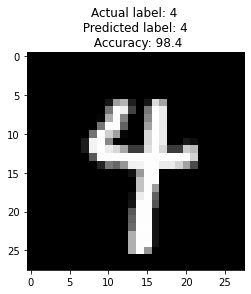

In [11]:
i = np.random.randint(0, 1000)
plt.imshow(test_images[i], cmap= 'gray')
a = model.predict(test_images)
print(a[i])
plt.title(f"Actual label: {test_labels[i]} \n Predicted label: {a[i].argmax()} \n Accuracy: {accuracy_score(test_labels, y_pred)*100}");